# 목표

1. 적절한 supervised learning 찾기
 
 * Naive Bayes : 
  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import wordninja
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yah12\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yah12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 데이터 로드

In [3]:
train_data = pd.read_csv("Training_set_label")
test_data = pd.read_csv("Test_set_label")

In [4]:
train_data

,Game title,Url,Genre,Label
0,애니팡4,sundaytoz.kakao.anipang4,Puzzle,9
1,마구마구 2020,netmarble.ma9bkr,Sports,10
2,라그나로크 오리진,gravity.ragnarokorigin.aos,Role Playing,0
3,라인업: 몽타주 그리기,jhulse.lineup,Casual,16
4,Stack Colors!,redforcegames.stack.colors,Casual,16
...,...,...,...,...
825,레전드 오브 룬테라,riotgames.legendsofruneterra,Card,8
826,트리비아크랙,etermax.preguntados.lite,Trivia,13
827,리틀빅시티2,gameloft.android.ANMP.GloftL2HM,Casual,16
828,스나이퍼 퓨리: 최고의 슈팅게임 - FPS,gameloft.android.ANMP.GloftFWHM,Action,12


In [5]:
print('게임 개수 :', len(train_data))

게임 개수 : 830


train_data의 수는 830개이고, col은 Game title, Url, Genre, Labeling으로 구성되어 있습니다. Game title과 Genre는 사용 할 필요가 없으므로 무시합니다.

In [6]:
test_data

,Game title,Url,Genre,Label
0,삼국지 전략,gamemorefun.rottk.kr,Strategy,4
1,MARVEL 슈퍼워,netease.g104na.gb,Strategy,4
2,스카이랜더스 링 오브 히어로즈,com2us.slroh.normal.freefull.google.global.and...,Role Playing,0
3,일루전 커넥트,cyou.illusionc.gp,Role Playing,0
4,윈윙은 WinWing,ivy.winwing,Arcade,14
5,Brawlhalla,air.com.ubisoft.brawl.halla.platform.fighting....,Action,12
6,Tom Clancy’s 엘리트 스쿼드,ubisoft.tces,Role Playing,0
7,비트레전드,coreplaying.WastelandsHeroes,Role Playing,0
8,크로스파이어:워존,joycity.cfwz,Strategy,4
9,기타 소녀 : 힐링 음악 게임,neowiz.game.guitargirl,Simulation,2


test_data는 총 34개의 파일로 구성되어 있습니다. 
# 수정필요

# 데이터 정제하기

크롤링 단계에서 중복된 내용은 제거했기 때문에 중복된 내용은 없습니다.

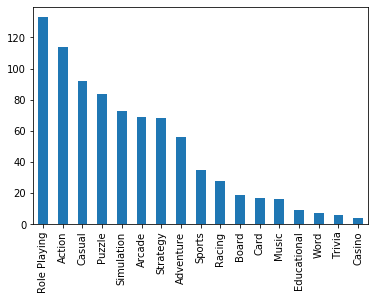

In [7]:
train_data['Genre'].value_counts().plot(kind = 'bar')

- 각 장르별 개수를 파악하니 개수가 매우 불균형합니다.
- 해결책
 1. 개수가 적은 장르 보충
 2. 개수가 적은 장르 제거

불균형을 해결하기 앞서 null값이 들어가 있는지 확인합니다.

In [8]:
print(train_data.isnull().values.any())

False


False가 나왔기 때문에 train_data에 null 값은 없습니다.

일단 데이터의 개수와 관계없이 데이터 전처리를 수행하겠습니다. Url을 보면 sundaytoz.kakao.anipang4와 같이 온점 등 각종 특수문자를 제거하는 작업을 합니다.

In [9]:
for i in range(len(train_data)):
    train_data['Url'][i] = text_to_word_sequence(train_data['Url'][i])

C:\Users\yah12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
for i in range(len(test_data)):
    test_data['Url'][i] = text_to_word_sequence(test_data['Url'][i])

C:\Users\yah12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
train_data

,Game title,Url,Genre,Label
0,애니팡4,"[sundaytoz, kakao, anipang4]",Puzzle,9
1,마구마구 2020,"[netmarble, ma9bkr]",Sports,10
2,라그나로크 오리진,"[gravity, ragnarokorigin, aos]",Role Playing,0
3,라인업: 몽타주 그리기,"[jhulse, lineup]",Casual,16
4,Stack Colors!,"[redforcegames, stack, colors]",Casual,16
...,...,...,...,...
825,레전드 오브 룬테라,"[riotgames, legendsofruneterra]",Card,8
826,트리비아크랙,"[etermax, preguntados, lite]",Trivia,13
827,리틀빅시티2,"[gameloft, android, anmp, gloftl2hm]",Casual,16
828,스나이퍼 퓨리: 최고의 슈팅게임 - FPS,"[gameloft, android, anmp, gloftfwhm]",Action,12


Tokenization을 통해 글자를 모두 소문자로 고치고, 특수 문자 제거 등의 과정을 수행했습니다. 이후 Url과 label만 따로 추출해 정수로 인코딩합니다.

In [12]:
imsi_X_train = train_data[['Url','Label']]

In [13]:
imsi_X_train

,Url,Label
0,"[sundaytoz, kakao, anipang4]",9
1,"[netmarble, ma9bkr]",10
2,"[gravity, ragnarokorigin, aos]",0
3,"[jhulse, lineup]",16
4,"[redforcegames, stack, colors]",16
...,...,...
825,"[riotgames, legendsofruneterra]",8
826,"[etermax, preguntados, lite]",13
827,"[gameloft, android, anmp, gloftl2hm]",16
828,"[gameloft, android, anmp, gloftfwhm]",12


In [14]:
test_data

,Game title,Url,Genre,Label
0,삼국지 전략,"[gamemorefun, rottk, kr]",Strategy,4
1,MARVEL 슈퍼워,"[netease, g104na, gb]",Strategy,4
2,스카이랜더스 링 오브 히어로즈,"[com2us, slroh, normal, freefull, google, glob...",Role Playing,0
3,일루전 커넥트,"[cyou, illusionc, gp]",Role Playing,0
4,윈윙은 WinWing,"[ivy, winwing]",Arcade,14
5,Brawlhalla,"[air, com, ubisoft, brawl, halla, platform, fi...",Action,12
6,Tom Clancy’s 엘리트 스쿼드,"[ubisoft, tces]",Role Playing,0
7,비트레전드,"[coreplaying, wastelandsheroes]",Role Playing,0
8,크로스파이어:워존,"[joycity, cfwz]",Strategy,4
9,기타 소녀 : 힐링 음악 게임,"[neowiz, game, guitargirl]",Simulation,2


In [15]:
imsi_X_test = test_data[['Url','Label']]

In [16]:
imsi_X_test

,Url,Label
0,"[gamemorefun, rottk, kr]",4
1,"[netease, g104na, gb]",4
2,"[com2us, slroh, normal, freefull, google, glob...",0
3,"[cyou, illusionc, gp]",0
4,"[ivy, winwing]",14
5,"[air, com, ubisoft, brawl, halla, platform, fi...",12
6,"[ubisoft, tces]",0
7,"[coreplaying, wastelandsheroes]",0
8,"[joycity, cfwz]",4
9,"[neowiz, game, guitargirl]",2


정수 인코딩 방법은 여러 가지가 있지만, 보통은 전처리 또는 빈도수가 높은 단어들만 사용하기 위해서 단어에 대한 빈도수를 기준으로 정렬한 뒤 부여합니다.

- 개인적인 생각으론 각 url당 내용이 너무 달라 어떤 의미를 가질지 궁금함

정수 인코딩에 앞서 각 단어들의 개수를 파악합니다.

In [17]:
vocab = {}
sentences = []

for i in range(len(imsi_X_train)):
    result = []
    for word in imsi_X_train['Url'][i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 45), ('google', 34), ('kr', 26), ('games', 20), ('net', 20), ('gp', 19), ('air', 18), ('game', 17), ('netmarble', 13), ('jp', 11), ('co', 11), ('free', 11), ('and', 10), ('puzzle', 10), ('com', 10), ('ea', 10), ('outfit7', 9), ('kakaogames', 9), ('nexon', 8), ('gameloft', 8), ('anmp', 8), ('sundaytoz', 7), ('mobile', 7), ('kairosoft', 7), ('row', 7), ('kakao', 6), ('king', 6), ('en', 6), ('shadow', 5), ('global', 5), ('playgendary', 5), ('coloring', 5), ('service', 5), ('aos', 4), ('ncsoft', 4), ('supercell', 4), ('playrix', 4), ('joycity', 4), ('block', 4), ('mobirix', 4), ('number', 4), ('stickman', 4), ('legends', 4), ('app', 4), ('longtukorea', 4), ('fungames', 4), ('sega', 4), ('ironhidegames', 4), ('kiwiwalks', 4), ('dog', 4), ('devolver', 4), ('hg', 4), ('ubisoft', 4), ('xdg', 4), ('miniclip', 4), ('sgn', 4), ('gravity', 3), ('music', 3), ('os', 3), ('nhnent', 3), ('ulugame', 3), ('neowiz', 3), ('korea', 3), ('master', 3), ('googleplay', 3), ('by', 3), ('pixel', 3),

android, google, net 등 구글 플레이스토어를 나타내는 일반적인 단어나 회사 명이 가장 많이 중복됐습니다. 이 외에 puzzle과 같은 의미있는 데이터도 확인할 수 있었습니다.

-  더 수정해야 할 내용
 1. bigfishgames와 같이 여러 의미를 가진 말을 big + fish + game으로 나누고 싶습니다.
 2. stemming을 통해 game과 games 를 같은 단어로 보게 만듭니다.

# 1. 공백이 없는 문장을 토큰화

ex) bigfishgames -> 'big', 'fish', 'games'

In [18]:
train_data_imsi = pd.read_csv("Training_set_labeling")

In [19]:
ddf = re.sub(r'[^a-zA-Z ]', '', train_data_imsi['Url'][0])

In [20]:
ddf

'sundaytozkakaoanipang'

In [21]:
text_to_word_sequence(ddf)

['sundaytozkakaoanipang']

In [22]:
word_tokenize(ddf)
#WordPunctTokenizer().tokenize(ddf)

['sundaytozkakaoanipang']

온점을 제거한 상태에서 sunday, kakao, anipang과 같이 추출해주는 라이브러리가 없는지 keras와 nltk의 다양한 토큰화 라이브러리를 이용해 확인해 보았습니다. 위와 같이 온점이 제거되고, 공백이 없는 url에서 토큰화를 할 방법은 없을까?

In [23]:
wordninja.split('sundaytozkakaoanipang')

['sunday', 'to', 'z', 'ka', 'kao', 'ani', 'pang']

In [24]:
wordninja.split('pixelbite')

['pixel', 'bite']

In [25]:
wordninja.split('netmable')

['net', 'mable']

In [26]:
wordninja.split('playgendary')

['play', 'g', 'end', 'ary']

In [27]:
wordninja.split('bigfishman')

['big', 'fish', 'man']

wordninja라는 라이브러리를 이용해보니 bigfishgame과 명확한 의미를 가진 단어는 잘 분류하지만, 사용자가 임의로 만든 내용에 대해선 분리를 잘 못합니다. netmable과 같은 게임 이름은 하나로 통일하고싶고, bigfishman은 나누고 싶은데 어떻게 할까? -> 일단은 분리 하지 말고 실행

# 2. Stemming

games, game과 같은 내용들을 통일하기 위해 stemming을 적용합니다.

In [28]:
#for i in range(len(train_data)):
#    train_data['Url'][i] = text_to_word_sequence(train_data['Url'][i])

In [29]:
s = PorterStemmer()
x_train = []
x_test = []

for i in range(len(train_data)):
    x_train.append([s.stem(w) for w in train_data['Url'][i]])

for i in range(len(test_data)):
    x_test.append([s.stem(w) for w in test_data['Url'][i]])


In [30]:
x_train

[['sundaytoz', 'kakao', 'anipang4'],
 ['netmarbl', 'ma9bkr'],
 ['graviti', 'ragnarokorigin', 'ao'],
 ['jhuls', 'lineup'],
 ['redforcegam', 'stack', 'color'],
 ['nexon', 'kart'],
 ['xtt', 'iasurv2'],
 ['ru', 'galya', 'drawjoust'],
 ['dangernoodl', 'killerbe'],
 ['monawa', 'samblood'],
 ['sangoku2kr', 'android'],
 ['idleif', 'abyssrium'],
 ['hellotoon', 'shinvatar'],
 ['klab', 'bleach'],
 ['outfit7', 'mytalkingtomfriend'],
 ['ncsoft', 'lineagem19'],
 ['cg', 'moneybust'],
 ['yoozoo', 'kr', 'snsgz2'],
 ['droidhang', 'twgame', 'restaur'],
 ['neonnewcryst', 'blast'],
 ['poa', 'kr'],
 ['pubg', 'krmobil'],
 ['gf', 'p5krkr', 'hwyad', 'googl'],
 ['carolgam', 'moemoegirl'],
 ['roblox', 'client'],
 ['ag', 'lwkr'],
 ['whitedot', 'bfg'],
 ['rollic', 'tanglemaster3d'],
 ['wordpuzzl', 'kr'],
 ['unicostudio', 'braintest2new'],
 ['nexon', 'fmk'],
 ['lilithgam', 'hgame', 'gp', 'kr'],
 ['lawson', 'tower'],
 ['celltop', 'spiralrol'],
 ['percent', 'royaldic'],
 ['appadvisori', 'drawclimb'],
 ['netmarbl', 's

In [31]:
x_test

[['gamemorefun', 'rottk', 'kr'],
 ['neteas', 'g104na', 'gb'],
 ['com2u',
  'slroh',
  'normal',
  'freeful',
  'googl',
  'global',
  'android',
  'common'],
 ['cyou', 'illusionc', 'gp'],
 ['ivi', 'winw'],
 ['air',
  'com',
  'ubisoft',
  'brawl',
  'halla',
  'platform',
  'fight',
  'action',
  'pvp'],
 ['ubisoft', 'tce'],
 ['coreplay', 'wastelandshero'],
 ['joyciti', 'cfwz'],
 ['neowiz', 'game', 'guitargirl'],
 ['zeptolab', 'robot'],
 ['riotgam', 'leagu', 'wildrift'],
 ['rayark', 'rush'],
 ['com2u', 'hw2', 'normal', 'freeful', 'googl', 'global', 'android', 'common'],
 ['pixodust', 'game', 'free', 'idl', 'sport', 'citi', 'tycoon', 'game'],
 ['king', 'crash'],
 ['kraftonpnix', 'projectp'],
 ['nhnent', 'cop'],
 ['ea', 'gp', 'maddennfl21mobil'],
 ['flerogam', 'ao', 'abyssworld'],
 ['centurygam', 'idlecouri'],
 ['an', 'dungeonrpg', 'kr'],
 ['blizzard', 'diablo', 'immort'],
 ['emagroup', 'wol2'],
 ['fansipan', 'stickman', 'shadow', 'knight', 'fightinggam'],
 ['webzen', 'r2m', 'googl'],
 [

In [32]:
vocab = {}
sentences = []

for i in range(len(x_train)):
    result = []
    for word in x_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 45), ('game', 37), ('googl', 34), ('kr', 26), ('gp', 20), ('net', 20), ('air', 18), ('netmarbl', 13), ('jp', 11), ('co', 11), ('free', 11), ('and', 10), ('puzzl', 10), ('com', 10), ('ea', 10), ('outfit7', 9), ('kakaogam', 9), ('color', 8), ('nexon', 8), ('gameloft', 8), ('anmp', 8), ('sundaytoz', 7), ('app', 7), ('mobil', 7), ('kairosoft', 7), ('row', 7), ('kakao', 6), ('king', 6), ('en', 6), ('shadow', 5), ('global', 5), ('playgendari', 5), ('servic', 5), ('bubbl', 5), ('ao', 4), ('ncsoft', 4), ('supercel', 4), ('playrix', 4), ('joyciti', 4), ('block', 4), ('mobirix', 4), ('number', 4), ('stickman', 4), ('legend', 4), ('longtukorea', 4), ('fungam', 4), ('sega', 4), ('ironhidegam', 4), ('kiwiwalk', 4), ('dog', 4), ('devolv', 4), ('hg', 4), ('ubisoft', 4), ('xdg', 4), ('miniclip', 4), ('sgn', 4), ('graviti', 3), ('music', 3), ('os', 3), ('nhnent', 3), ('ulugam', 3), ('neowiz', 3), ('korea', 3), ('master', 3), ('googleplay', 3), ('by', 3), ('pixel', 3), ('zombi', 3), ('com2u

google -> googl, netmable -> netmabl과 같이 e가 사라지는 경우가 있지만, games와 game을 모두 game으로 보는 등 일반화가 잘 되었습니다. 하지만 ('g', 3)과 같이 전혀 의미 없는 단어나 of, by등과 같은 조사를 없애기 위해 관련 단어들은 제거하겠습니다.

# 3. 불용어 제거

In [33]:
stop_words = set(stopwords.words('english'))
X_train = []
X_test = []
for i in range(len(x_train)):
    imsi_list = []
    for w in x_train[i]:
        if w not in stop_words:
            imsi_list.append(w)
    X_train.append(imsi_list)
    
    
for i in range(len(x_test)):
    imsi_list = []
    for w in x_test[i]:
        if w not in stop_words:
            imsi_list.append(w)
    X_test.append(imsi_list)


In [34]:
X_train

[['sundaytoz', 'kakao', 'anipang4'],
 ['netmarbl', 'ma9bkr'],
 ['graviti', 'ragnarokorigin', 'ao'],
 ['jhuls', 'lineup'],
 ['redforcegam', 'stack', 'color'],
 ['nexon', 'kart'],
 ['xtt', 'iasurv2'],
 ['ru', 'galya', 'drawjoust'],
 ['dangernoodl', 'killerbe'],
 ['monawa', 'samblood'],
 ['sangoku2kr', 'android'],
 ['idleif', 'abyssrium'],
 ['hellotoon', 'shinvatar'],
 ['klab', 'bleach'],
 ['outfit7', 'mytalkingtomfriend'],
 ['ncsoft', 'lineagem19'],
 ['cg', 'moneybust'],
 ['yoozoo', 'kr', 'snsgz2'],
 ['droidhang', 'twgame', 'restaur'],
 ['neonnewcryst', 'blast'],
 ['poa', 'kr'],
 ['pubg', 'krmobil'],
 ['gf', 'p5krkr', 'hwyad', 'googl'],
 ['carolgam', 'moemoegirl'],
 ['roblox', 'client'],
 ['ag', 'lwkr'],
 ['whitedot', 'bfg'],
 ['rollic', 'tanglemaster3d'],
 ['wordpuzzl', 'kr'],
 ['unicostudio', 'braintest2new'],
 ['nexon', 'fmk'],
 ['lilithgam', 'hgame', 'gp', 'kr'],
 ['lawson', 'tower'],
 ['celltop', 'spiralrol'],
 ['percent', 'royaldic'],
 ['appadvisori', 'drawclimb'],
 ['netmarbl', 's

In [35]:
X_test

[['gamemorefun', 'rottk', 'kr'],
 ['neteas', 'g104na', 'gb'],
 ['com2u',
  'slroh',
  'normal',
  'freeful',
  'googl',
  'global',
  'android',
  'common'],
 ['cyou', 'illusionc', 'gp'],
 ['ivi', 'winw'],
 ['air',
  'com',
  'ubisoft',
  'brawl',
  'halla',
  'platform',
  'fight',
  'action',
  'pvp'],
 ['ubisoft', 'tce'],
 ['coreplay', 'wastelandshero'],
 ['joyciti', 'cfwz'],
 ['neowiz', 'game', 'guitargirl'],
 ['zeptolab', 'robot'],
 ['riotgam', 'leagu', 'wildrift'],
 ['rayark', 'rush'],
 ['com2u', 'hw2', 'normal', 'freeful', 'googl', 'global', 'android', 'common'],
 ['pixodust', 'game', 'free', 'idl', 'sport', 'citi', 'tycoon', 'game'],
 ['king', 'crash'],
 ['kraftonpnix', 'projectp'],
 ['nhnent', 'cop'],
 ['ea', 'gp', 'maddennfl21mobil'],
 ['flerogam', 'ao', 'abyssworld'],
 ['centurygam', 'idlecouri'],
 ['dungeonrpg', 'kr'],
 ['blizzard', 'diablo', 'immort'],
 ['emagroup', 'wol2'],
 ['fansipan', 'stickman', 'shadow', 'knight', 'fightinggam'],
 ['webzen', 'r2m', 'googl'],
 ['rpgsn

In [36]:
vocab = {}
sentences = []

for i in range(len(X_train)):
    result = []
    for word in X_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 45), ('game', 37), ('googl', 34), ('kr', 26), ('gp', 20), ('net', 20), ('air', 18), ('netmarbl', 13), ('jp', 11), ('co', 11), ('free', 11), ('puzzl', 10), ('com', 10), ('ea', 10), ('outfit7', 9), ('kakaogam', 9), ('color', 8), ('nexon', 8), ('gameloft', 8), ('anmp', 8), ('sundaytoz', 7), ('app', 7), ('mobil', 7), ('kairosoft', 7), ('row', 7), ('kakao', 6), ('king', 6), ('en', 6), ('shadow', 5), ('global', 5), ('playgendari', 5), ('servic', 5), ('bubbl', 5), ('ao', 4), ('ncsoft', 4), ('supercel', 4), ('playrix', 4), ('joyciti', 4), ('block', 4), ('mobirix', 4), ('number', 4), ('stickman', 4), ('legend', 4), ('longtukorea', 4), ('fungam', 4), ('sega', 4), ('ironhidegam', 4), ('kiwiwalk', 4), ('dog', 4), ('devolv', 4), ('hg', 4), ('ubisoft', 4), ('xdg', 4), ('miniclip', 4), ('sgn', 4), ('graviti', 3), ('music', 3), ('os', 3), ('nhnent', 3), ('ulugam', 3), ('neowiz', 3), ('korea', 3), ('master', 3), ('googleplay', 3), ('pixel', 3), ('zombi', 3), ('com2u', 3), ('normal', 3), ('

# 4. 글자수 적은 것 제거

kr, jp, gf 등 의미는 존재하지만 (korea, japan 등) 2글자인 단어들도 제거해 주겠습니다.

In [37]:
del x_train
del x_test

In [38]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
x_train = []
x_test = []


for i in range(len(X_train)):
    imsi_list = []
    
    # 2글자 이하 제거
    for w in X_train[i]:
        imsi_list.append(shortword.sub('',w))
    
    # '' 제거
    if '' in imsi_list:
        imsi_list.remove('')
    
    # remove 같은 경우 한 번 수행시 하나만 제거 그래서 최대 횟수를 시행해야함
    if '' in imsi_list:
        imsi_list.remove('')
    
    if '' in imsi_list:
        imsi_list.remove('')
    
    x_train.append(imsi_list)

for i in range(len(X_test)):
    imsi_list = []
    
    # 2글자 이하 제거
    for w in X_test[i]:
        imsi_list.append(shortword.sub('',w))
    
    # '' 제거
    if '' in imsi_list:
        imsi_list.remove('')
    
    # remove 같은 경우 한 번 수행시 하나만 제거 그래서 최대 횟수를 시행해야함
    if '' in imsi_list:
        imsi_list.remove('')
    
    if '' in imsi_list:
        imsi_list.remove('')
    
    x_test.append(imsi_list)

In [39]:
x_train

[['sundaytoz', 'kakao', 'anipang4'],
 ['netmarbl', 'ma9bkr'],
 ['graviti', 'ragnarokorigin'],
 ['jhuls', 'lineup'],
 ['redforcegam', 'stack', 'color'],
 ['nexon', 'kart'],
 ['xtt', 'iasurv2'],
 ['galya', 'drawjoust'],
 ['dangernoodl', 'killerbe'],
 ['monawa', 'samblood'],
 ['sangoku2kr', 'android'],
 ['idleif', 'abyssrium'],
 ['hellotoon', 'shinvatar'],
 ['klab', 'bleach'],
 ['outfit7', 'mytalkingtomfriend'],
 ['ncsoft', 'lineagem19'],
 ['moneybust'],
 ['yoozoo', 'snsgz2'],
 ['droidhang', 'twgame', 'restaur'],
 ['neonnewcryst', 'blast'],
 ['poa'],
 ['pubg', 'krmobil'],
 ['p5krkr', 'hwyad', 'googl'],
 ['carolgam', 'moemoegirl'],
 ['roblox', 'client'],
 ['lwkr'],
 ['whitedot', 'bfg'],
 ['rollic', 'tanglemaster3d'],
 ['wordpuzzl'],
 ['unicostudio', 'braintest2new'],
 ['nexon', 'fmk'],
 ['lilithgam', 'hgame'],
 ['lawson', 'tower'],
 ['celltop', 'spiralrol'],
 ['percent', 'royaldic'],
 ['appadvisori', 'drawclimb'],
 ['netmarbl', 'stonemmogb'],
 ['samkokkr'],
 ['supercel', 'brawlstar'],
 ['p

In [40]:
x_test

[['gamemorefun', 'rottk'],
 ['neteas', 'g104na'],
 ['com2u',
  'slroh',
  'normal',
  'freeful',
  'googl',
  'global',
  'android',
  'common'],
 ['cyou', 'illusionc'],
 ['ivi', 'winw'],
 ['air',
  'com',
  'ubisoft',
  'brawl',
  'halla',
  'platform',
  'fight',
  'action',
  'pvp'],
 ['ubisoft', 'tce'],
 ['coreplay', 'wastelandshero'],
 ['joyciti', 'cfwz'],
 ['neowiz', 'game', 'guitargirl'],
 ['zeptolab', 'robot'],
 ['riotgam', 'leagu', 'wildrift'],
 ['rayark', 'rush'],
 ['com2u', 'hw2', 'normal', 'freeful', 'googl', 'global', 'android', 'common'],
 ['pixodust', 'game', 'free', 'idl', 'sport', 'citi', 'tycoon', 'game'],
 ['king', 'crash'],
 ['kraftonpnix', 'projectp'],
 ['nhnent', 'cop'],
 ['maddennfl21mobil'],
 ['flerogam', 'abyssworld'],
 ['centurygam', 'idlecouri'],
 ['dungeonrpg'],
 ['blizzard', 'diablo', 'immort'],
 ['emagroup', 'wol2'],
 ['fansipan', 'stickman', 'shadow', 'knight', 'fightinggam'],
 ['webzen', 'r2m', 'googl'],
 ['rpgsnack', 'apartmenteden'],
 ['tjbnew4399kr', 

In [41]:
vocab = {}
sentences = []

for i in range(len(x_train)):
    result = []
    for word in x_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 45), ('game', 37), ('googl', 34), ('net', 20), ('air', 18), ('netmarbl', 13), ('free', 11), ('puzzl', 10), ('com', 10), ('outfit7', 9), ('kakaogam', 9), ('color', 8), ('nexon', 8), ('gameloft', 8), ('anmp', 8), ('sundaytoz', 7), ('app', 7), ('mobil', 7), ('kairosoft', 7), ('row', 7), ('kakao', 6), ('king', 6), ('shadow', 5), ('global', 5), ('playgendari', 5), ('servic', 5), ('bubbl', 5), ('ncsoft', 4), ('supercel', 4), ('playrix', 4), ('joyciti', 4), ('block', 4), ('mobirix', 4), ('number', 4), ('stickman', 4), ('legend', 4), ('longtukorea', 4), ('fungam', 4), ('sega', 4), ('ironhidegam', 4), ('kiwiwalk', 4), ('dog', 4), ('devolv', 4), ('ubisoft', 4), ('xdg', 4), ('miniclip', 4), ('sgn', 4), ('graviti', 3), ('music', 3), ('nhnent', 3), ('ulugam', 3), ('neowiz', 3), ('korea', 3), ('master', 3), ('googleplay', 3), ('pixel', 3), ('zombi', 3), ('com2u', 3), ('normal', 3), ('freeful', 3), ('common', 3), ('surviv', 3), ('rustylak', 3), ('age', 3), ('jakowski', 3), ('paid', 3), (

위에 정의된 글자들은 다음 정제 과정을 거침

- 불용어 제거
- 2글자 이하 제거
- 어간 추출(Stemming)


추가로 필요한 작업

- bigfishman -> big, fish, man과 같이 분리하기
- x_train에 하나만 존재 하는 단어들을 어떻게 처리할까? (보통은 단어의 빈도수가 적으면 제거)

일단은 단어 한 개 짜리를 제거하지 않고 작업을 진행해보자.

# 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터에 정수 인코딩을 수행합니다.

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [43]:
print(tokenizer.word_index)

{'android': 1, 'game': 2, 'googl': 3, 'net': 4, 'air': 5, 'netmarbl': 6, 'free': 7, 'puzzl': 8, 'com': 9, 'outfit7': 10, 'kakaogam': 11, 'color': 12, 'nexon': 13, 'gameloft': 14, 'anmp': 15, 'sundaytoz': 16, 'app': 17, 'mobil': 18, 'kairosoft': 19, 'row': 20, 'kakao': 21, 'king': 22, 'shadow': 23, 'global': 24, 'playgendari': 25, 'servic': 26, 'bubbl': 27, 'ncsoft': 28, 'supercel': 29, 'playrix': 30, 'joyciti': 31, 'block': 32, 'mobirix': 33, 'number': 34, 'stickman': 35, 'legend': 36, 'longtukorea': 37, 'fungam': 38, 'sega': 39, 'ironhidegam': 40, 'kiwiwalk': 41, 'dog': 42, 'devolv': 43, 'ubisoft': 44, 'xdg': 45, 'miniclip': 46, 'sgn': 47, 'graviti': 48, 'music': 49, 'nhnent': 50, 'ulugam': 51, 'neowiz': 52, 'korea': 53, 'master': 54, 'googleplay': 55, 'pixel': 56, 'zombi': 57, 'com2u': 58, 'normal': 59, 'freeful': 60, 'common': 61, 'surviv': 62, 'rustylak': 63, 'age': 64, 'jakowski': 65, 'paid': 66, 'scottgam': 67, 'snkplaymor': 68, 'buffstudio': 69, 'halfbrick': 70, 'adventur': 71, 

등장 빈도수가 높은 순서대로 1481개의 단어에 정수를 부여했습니다. 빈도수가 적은 단어들이 데이터에 얼마만큼의 비중을 차지하는지 확인하겠습니다.

In [44]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1481
등장 빈도가 1번 이하인 희귀 단어의 수: 1277
단어 집합에서 희귀 단어의 비율: 86.2255232950709
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 62.9995066600888


In [45]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1481
등장 빈도가 2번 이하인 희귀 단어의 수: 1398
단어 집합에서 희귀 단어의 비율: 94.39567859554356
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 74.93833251110014


위 내용을 확인하면 1,2번만 등장하는 단어의 비율이 무려 94%이고 그 단어의 등장 빈도 비율또한 74%에 달합니다. 그래서 함부로 제거하기가 힘듭니다.

일단 제거하지 않고 그대로 진행

In [46]:
imsi_total = total_cnt + 2

tokenizer = Tokenizer(imsi_total, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [47]:
x_train[:5]

[[17, 22, 206], [7, 207], [49, 208], [209, 210], [211, 212, 13]]

In [48]:
x_test[:5]

[[1, 1], [142, 1], [59, 1, 60, 61, 4, 25, 2, 62], [898, 1], [1, 1]]

단어집합에 없는 단어인 OOV는 1로 나타내기 때문에, 기존 tokenizer.word_index에서 1을 더해줘야 합니다. ex) 'sundaytoz', 'kakao', 'anipang4'는 16, 21, 205이지만, 1을 OOV로 취급하기 때문에 17, 22, 206으로 나타냅니다.

상위 5개만 출력해보면, 각 단어에 대한 정수로 변환된 것을 확인할 수 있습니다.

In [49]:
y_train = np.array(train_data['Label'])
y_test = np.array(test_data['Label'])

정수 인코딩 단계에서 빈도수가 적은 단어를 제거했다면, 그 내용은 공백이되어 empty sample이 됩니다. 그것을 제거해 줘야 하지만, 빈도수 적은 단어를 제거하지 않았기 때문에 그냥 넙어갑니다.

# 패딩

서로 다른 길이의 샘플들의 길이를 동일하게 맞춰줍니다. 먼저 각 샘플들의 길이 분포를 확인하고, 어떻게 할 지 결정하겠습니다.

리뷰의 최대 길이 : 8
리뷰의 평균 길이 : 2.442168674698795


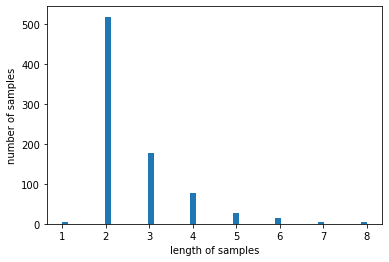

In [50]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

830개의 sample의 평균 길이는 2.44입니다. 이제 모델이 처리할 수 있도록, x_train과 x_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있습니다. 특정 길이 변수를 max_len으로 정하는데, 최적의 max_len을 찾아야 합니다. 위 그래프를 봤을 때 max_len의 길이는 5가 적당할 것 같습니다.

In [51]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [52]:
max_len = 5
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 5 이하인 샘플의 비율: 97.71084337349397


5이하인 비율이 97%이니 모든 샘플의 길이를 5로 맞추겠습니다.

In [53]:
x_train = pad_sequences(x_train, maxlen = max_len)

In [54]:
x_train

array([[   0,    0,   17,   22,  206],
       [   0,    0,    0,    7,  207],
       [   0,    0,    0,   49,  208],
       ...,
       [   0,   15,    2,   16, 1480],
       [   0,   15,    2,   16, 1481],
       [   0,    0,    0,  205, 1482]])

In [55]:
x_test = pad_sequences(x_test, maxlen = max_len)

In [56]:
x_test

array([[   0,    0,    0,    1,    1],
       [   0,    0,    0,  142,    1],
       [  61,    4,   25,    2,   62],
       [   0,    0,    0,  898,    1],
       [   0,    0,    0,    1,    1],
       [   1, 1250, 1223, 1026, 1025],
       [   0,    0,    0,   45,    1],
       [   0,    0,    0,    1,    1],
       [   0,    0,    0,   32,    1],
       [   0,    0,   53,    3,    1],
       [   0,    0,    0,   80,    1],
       [   0,    0,  105,  344,    1],
       [   0,    0,    0,  565,    1],
       [  61,    4,   25,    2,   62],
       [  94, 1455, 1105,  290,    3],
       [   0,    0,    0,   23,    1],
       [   0,    0,    0,    1,    1],
       [   0,    0,    0,   51,    1],
       [   0,    0,    0,    0,    1],
       [   0,    0,    0,    1,    1],
       [   0,    0,    0,    1,    1],
       [   0,    0,    0,    0,    1],
       [   0,    0, 1472,    1,    1],
       [   0,    0,    0,    1,    1],
       [1222,   36,   24, 1224,  138],
       [   0,    0,  104,

In [57]:
# y_train의 개수 저장
len_y_train = len(y_train)

# y_test의 개수 저장
len_y_test = len(y_test)

y_train = list(y_train)
y_test = list(y_test)

y_train.extend(y_test)

In [58]:
imsi_y_train_test = pd.get_dummies(y_train)

In [59]:
imsi_y_train_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
y_train = imsi_y_train_test[:len_y_train]
y_test = imsi_y_train_test[len_y_train:]

In [61]:
y_train.shape

(830, 17)

In [62]:
y_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
830,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
831,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
835,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
836,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
838,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
839,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train = np.array(y_train)
y_test = np.array(y_test)

마지막으로 one_hot encoding을 사용해 다중 분류를 할 수 있도록 만들었습니다.

# LSTM으로 분류하기

LSTM을 이용해 분류를 시도합니다. 개인적인 생각으로는 

In [64]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
model = Sequential()
model.add(Embedding(imsi_total, 100))
model.add(LSTM(128))
model.add(Dense(17, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [66]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 664 samples, validate on 166 samples
Epoch 1/15
480/664 [====================>.........] - ETA: 0s - loss: 2.8158 - acc: 0.1333
Epoch 00001: val_acc improved from -inf to 0.06627, saving model to best_model.h5
664/664 [==============================] - 2s 3ms/sample - loss: 2.8032 - acc: 0.1566 - val_loss: 2.7705 - val_acc: 0.0663
Epoch 2/15
540/664 [=======================>......] - ETA: 0s - loss: 2.6571 - acc: 0.1870
Epoch 00002: val_acc did not improve from 0.06627
664/664 [==============================] - 0s 308us/sample - loss: 2.6280 - acc: 0.1837 - val_loss: 2.6807 - val_acc: 0.0663
Epoch 3/15
540/664 [=======================>......] - ETA: 0s - loss: 2.4596 - acc: 0.1870
Epoch 00003: val_acc did not improve from 0.06627
664/664 [==============================] - 0s 272us/sample - loss: 2.4585 - acc: 0.1837 - val_loss: 2.6127 - val_acc: 0.0663
Epoch 4/15
660/664 [============

테스트 데이터에 대해서 평가

In [68]:
loss_and_metrics = model.evaluate(x_test,y_test, batch_size = 32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

34/34 [==============================] - 0s 293us/sample - loss: 1.8628 - acc: 0.3529

loss_and_metrics : [1.8627574443817139, 0.3529412]


약 35%의 정확도를 보입니다.

In [71]:
#xhat_idx = np.random.choice(x_test.shape[0], 5)
# x_test의 개수가 적으니 모두 확인해보자
xhat_idx = []
for i in range(len(x_test)):
    xhat_idx.append(i)

xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(len(x_test)):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 4, Predict : 9
True : 4, Predict : 9
True : 0, Predict : 0
True : 0, Predict : 0
True : 14, Predict : 9
True : 12, Predict : 12
True : 0, Predict : 12
True : 0, Predict : 9
True : 4, Predict : 0
True : 2, Predict : 16
True : 16, Predict : 12
True : 4, Predict : 4
True : 4, Predict : 9
True : 0, Predict : 0
True : 2, Predict : 16
True : 12, Predict : 16
True : 16, Predict : 9
True : 12, Predict : 9
True : 10, Predict : 0
True : 16, Predict : 9
True : 16, Predict : 9
True : 0, Predict : 0
True : 0, Predict : 9
True : 0, Predict : 9
True : 12, Predict : 12
True : 0, Predict : 0
True : 5, Predict : 9
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 12, Predict : 9
True : 14, Predict : 9
True : 0, Predict : 9


- x_test에 OOV가 많고, y_test에는 존재하지 않는 label도 있어 성능이 좋지 않았습니다. 예를 들어 [0, 0, 0, 1, 1]의 Predict = 9로 갔습니다.
- x_train에 label이 골고루 분포해 있지 않아 좋은 predict값을 얻지 못했습니다.

# 느낀 점

1. embedding 관련 지식이 부족함
2. model 관련 지식이 부족함